WLRMAwALS4Sparse baseline solver converged at iteration 15.
WLRMAwALS4Sparse baseline solver reached the maximum number of iterations.
WLRMAwALS4Sparse nesterov solver converged at iteration 173.
WLRMAwALS4Sparse anderson solver converged at iteration 69.
WLRMAwALS4Sparse baseline solver converged at iteration 22.
WLRMAwALS4Sparse baseline solver reached the maximum number of iterations.
WLRMAwALS4Sparse nesterov solver reached the maximum number of iterations.
WLRMAwALS4Sparse anderson solver converged at iteration 89.
WLRMAwALS4Sparse baseline solver converged at iteration 26.
WLRMAwALS4Sparse baseline solver reached the maximum number of iterations.
WLRMAwALS4Sparse nesterov solver reached the maximum number of iterations.
WLRMAwALS4Sparse anderson solver converged at iteration 111.


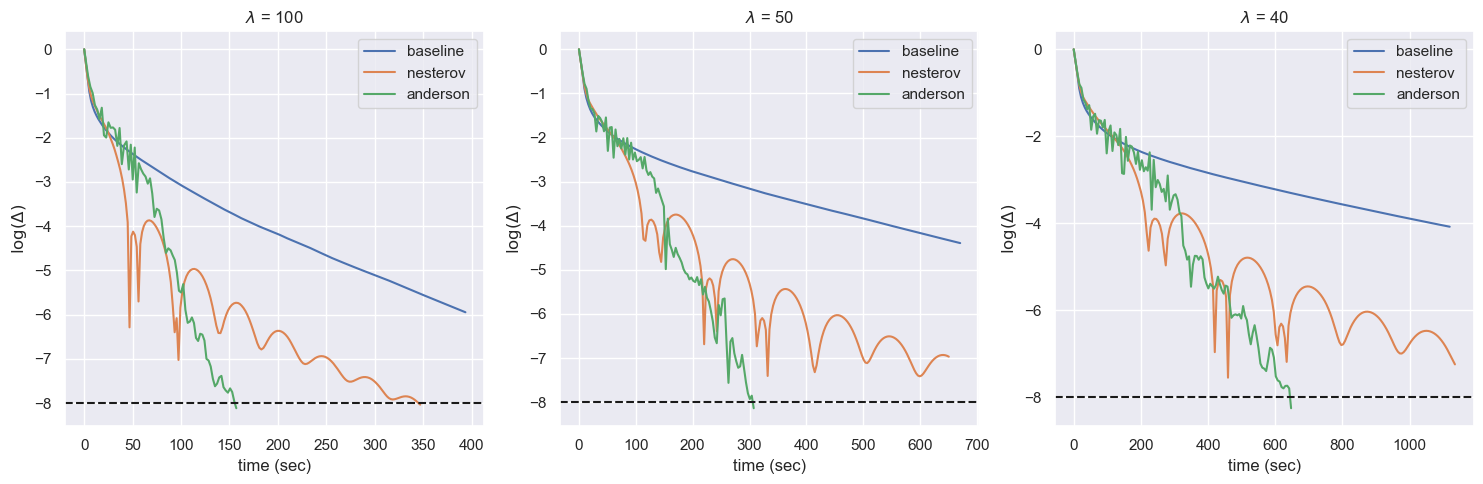

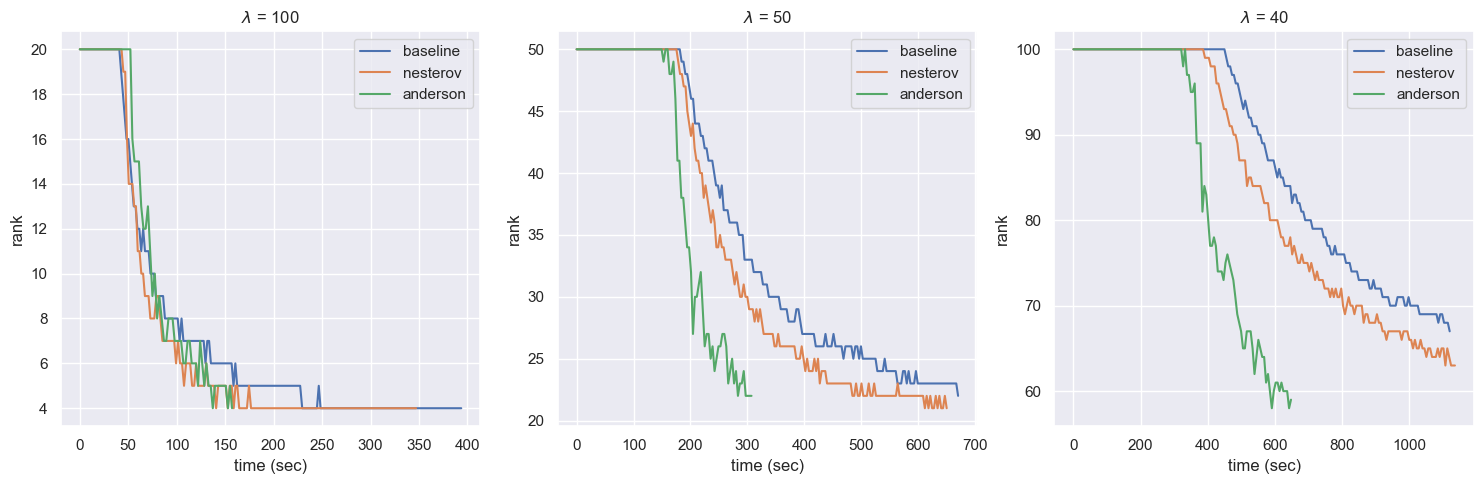

In [1]:
from wlrma_als_python import *

# load data
M = create_ratings_matrix('data/ratings.dat')
# parameter settings.
lamda = [100, 50, 40]
k = [20, 50, 100]
# run wlrma on the data.
sns.set()
fig1, ax1 = plt.subplots(1, len(lamda), figsize=(15, 5))
fig2, ax2 = plt.subplots(1, len(lamda), figsize=(15, 5))
for i, (lamda_, k_) in enumerate(zip(lamda, k)):
    # A warm start to initialize A0 and B0 for the algorithm.
    W = np.ones(M.shape)  # W for an unweighted ALS.
    s0 = WLRMAwALS4Sparse(M, W, k_, lamda=lamda_, max_iter=50, tol=1e-4)
    np.random.seed(1)
    A0 = np.random.rand(M.shape[0], k_)
    B0 = np.random.rand(M.shape[1], k_)
    A0, B0 = s0.solve(A0, B0)
    
    # weight setting.
    W = np.zeros(M.shape)
    W[M != 0] = 1
    # run the baseline model.
    s1 = WLRMAwALS4Sparse(M, W, k_, lamda=lamda_, solver='baseline')   
    s1.solve(A0, B0, verbose=False)
    # run the nesterov model.
    s2 = WLRMAwALS4Sparse(M, W, k_, lamda=lamda_, solver='nesterov')
    s2.solve(A0, B0, verbose=False)
    # run the anderson model.
    s3 = WLRMAwALS4Sparse(M, W, k_, lamda=lamda_, solver='anderson', memory=3)
    s3.solve(A0, B0, verbose=False)
    
    # plot the log delta.
    ax1[i].plot(s1.elapsed_time, np.log10(s1.delta), label='baseline')
    ax1[i].plot(s2.elapsed_time, np.log10(s2.delta), label='nesterov')
    ax1[i].plot(s3.elapsed_time, np.log10(s3.delta), label='anderson')
    ax1[i].axhline(y=np.log10(s1.tol), color='k', linestyle='--')
    ax1[i].set_xlabel('time (sec)')
    ax1[i].set_ylabel(r'$\log(\Delta)$')
    ax1[i].set_title(r'$\lambda$ = {}'.format(lamda_))
    ax1[i].legend()
    # plot the solution rank.
    ax2[i].plot(s1.elapsed_time, s1.solution_rank, label='baseline')
    ax2[i].plot(s2.elapsed_time, s2.solution_rank, label='nesterov')
    ax2[i].plot(s3.elapsed_time, s3.solution_rank, label='anderson')
    ax2[i].set_xlabel('time (sec)')
    ax2[i].set_ylabel('rank')
    ax2[i].set_title(r'$\lambda$ = {}'.format(lamda_))
    ax2[i].legend()

fig1.tight_layout()
fig2.tight_layout()
# fig1.savefig('fig/wlrma_als_log_delta.pdf')
# fig2.savefig('fig/wlrma_als_solution_rank.pdf')